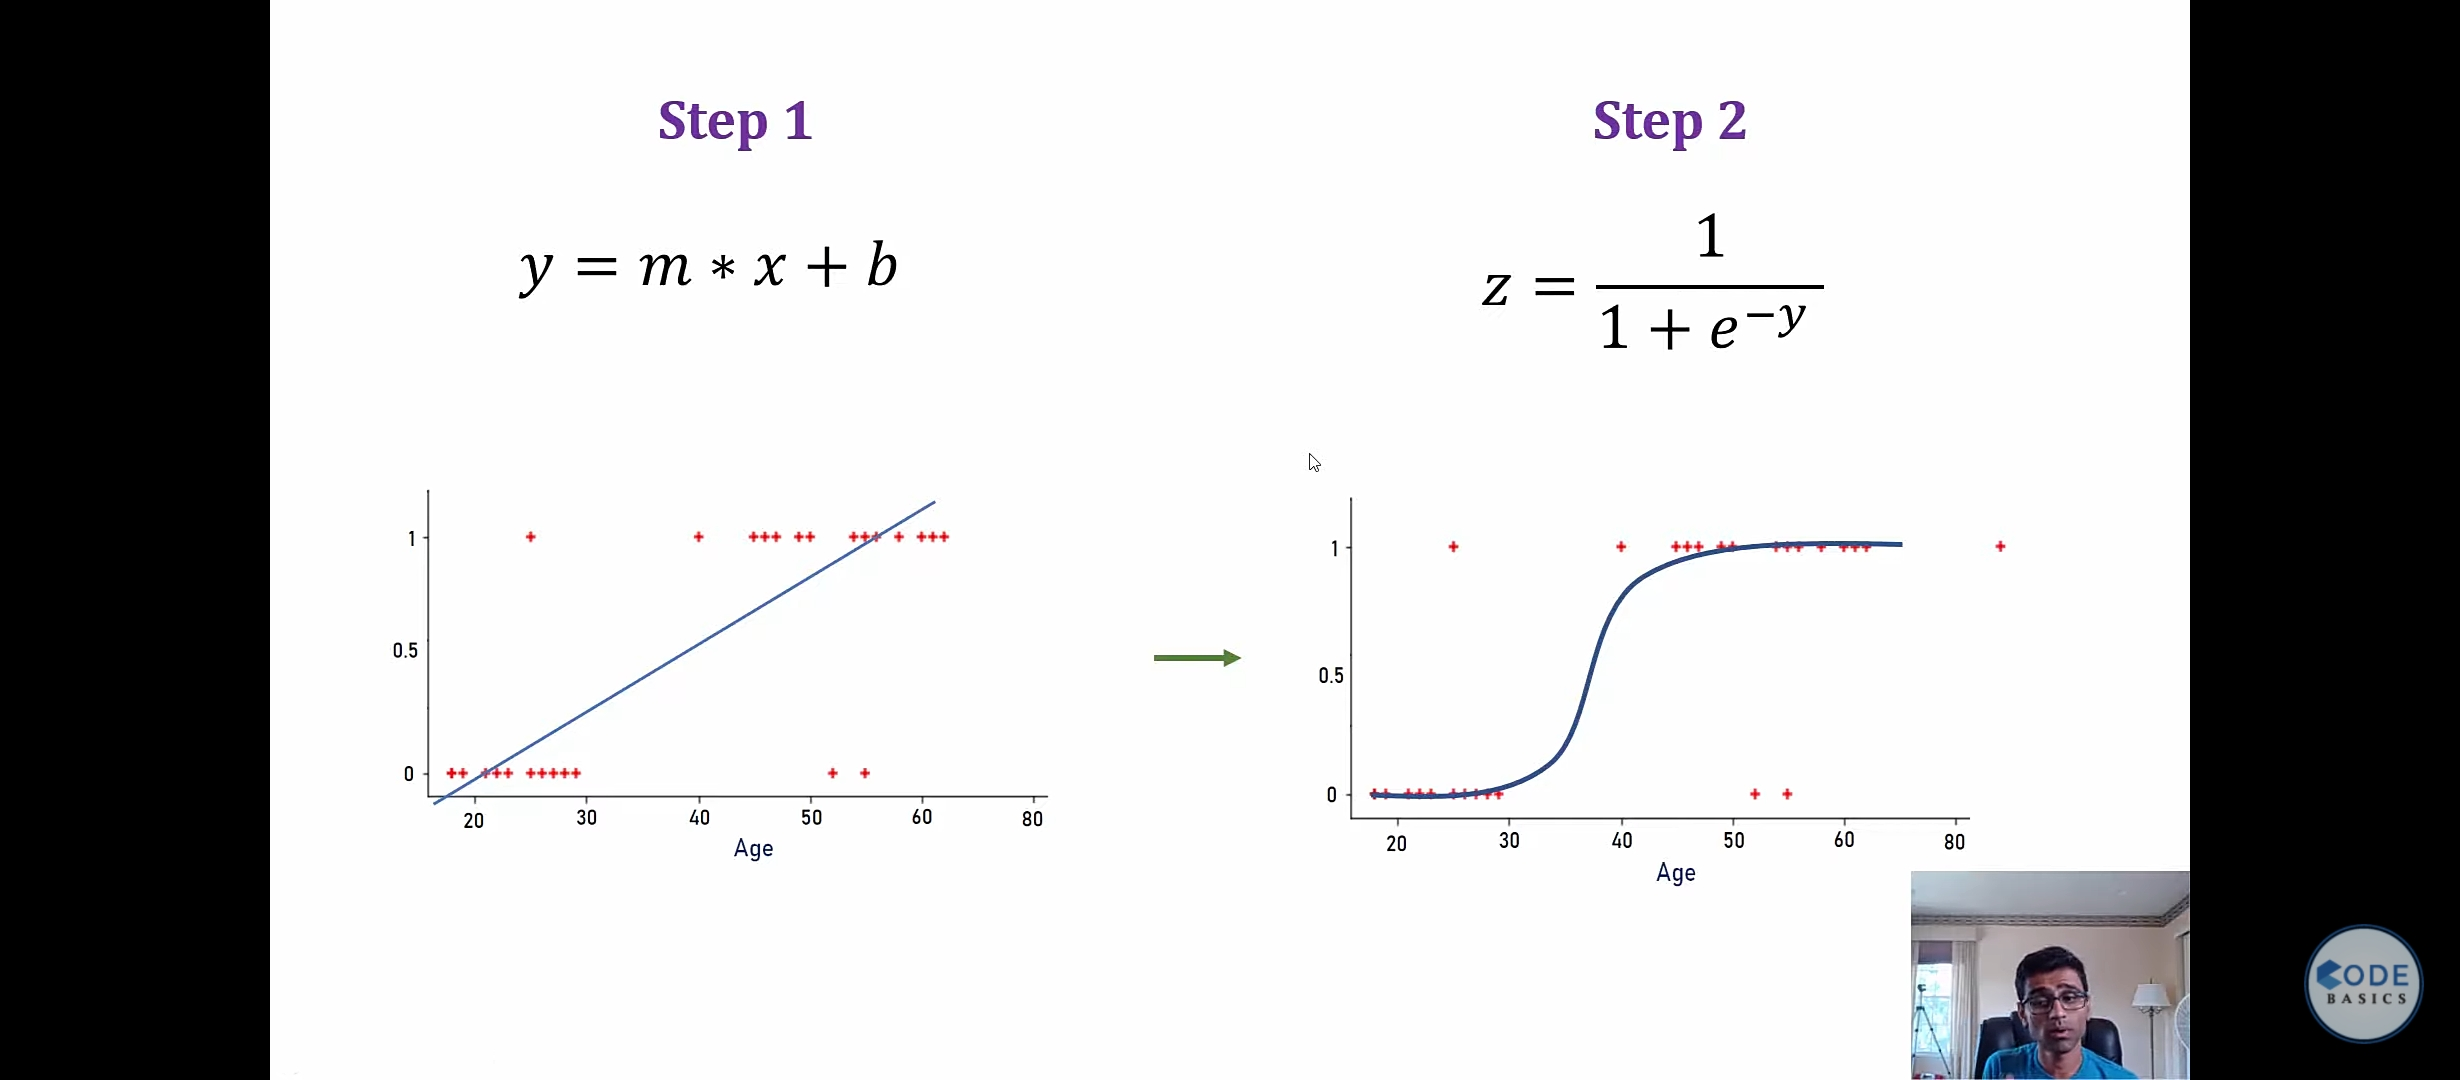

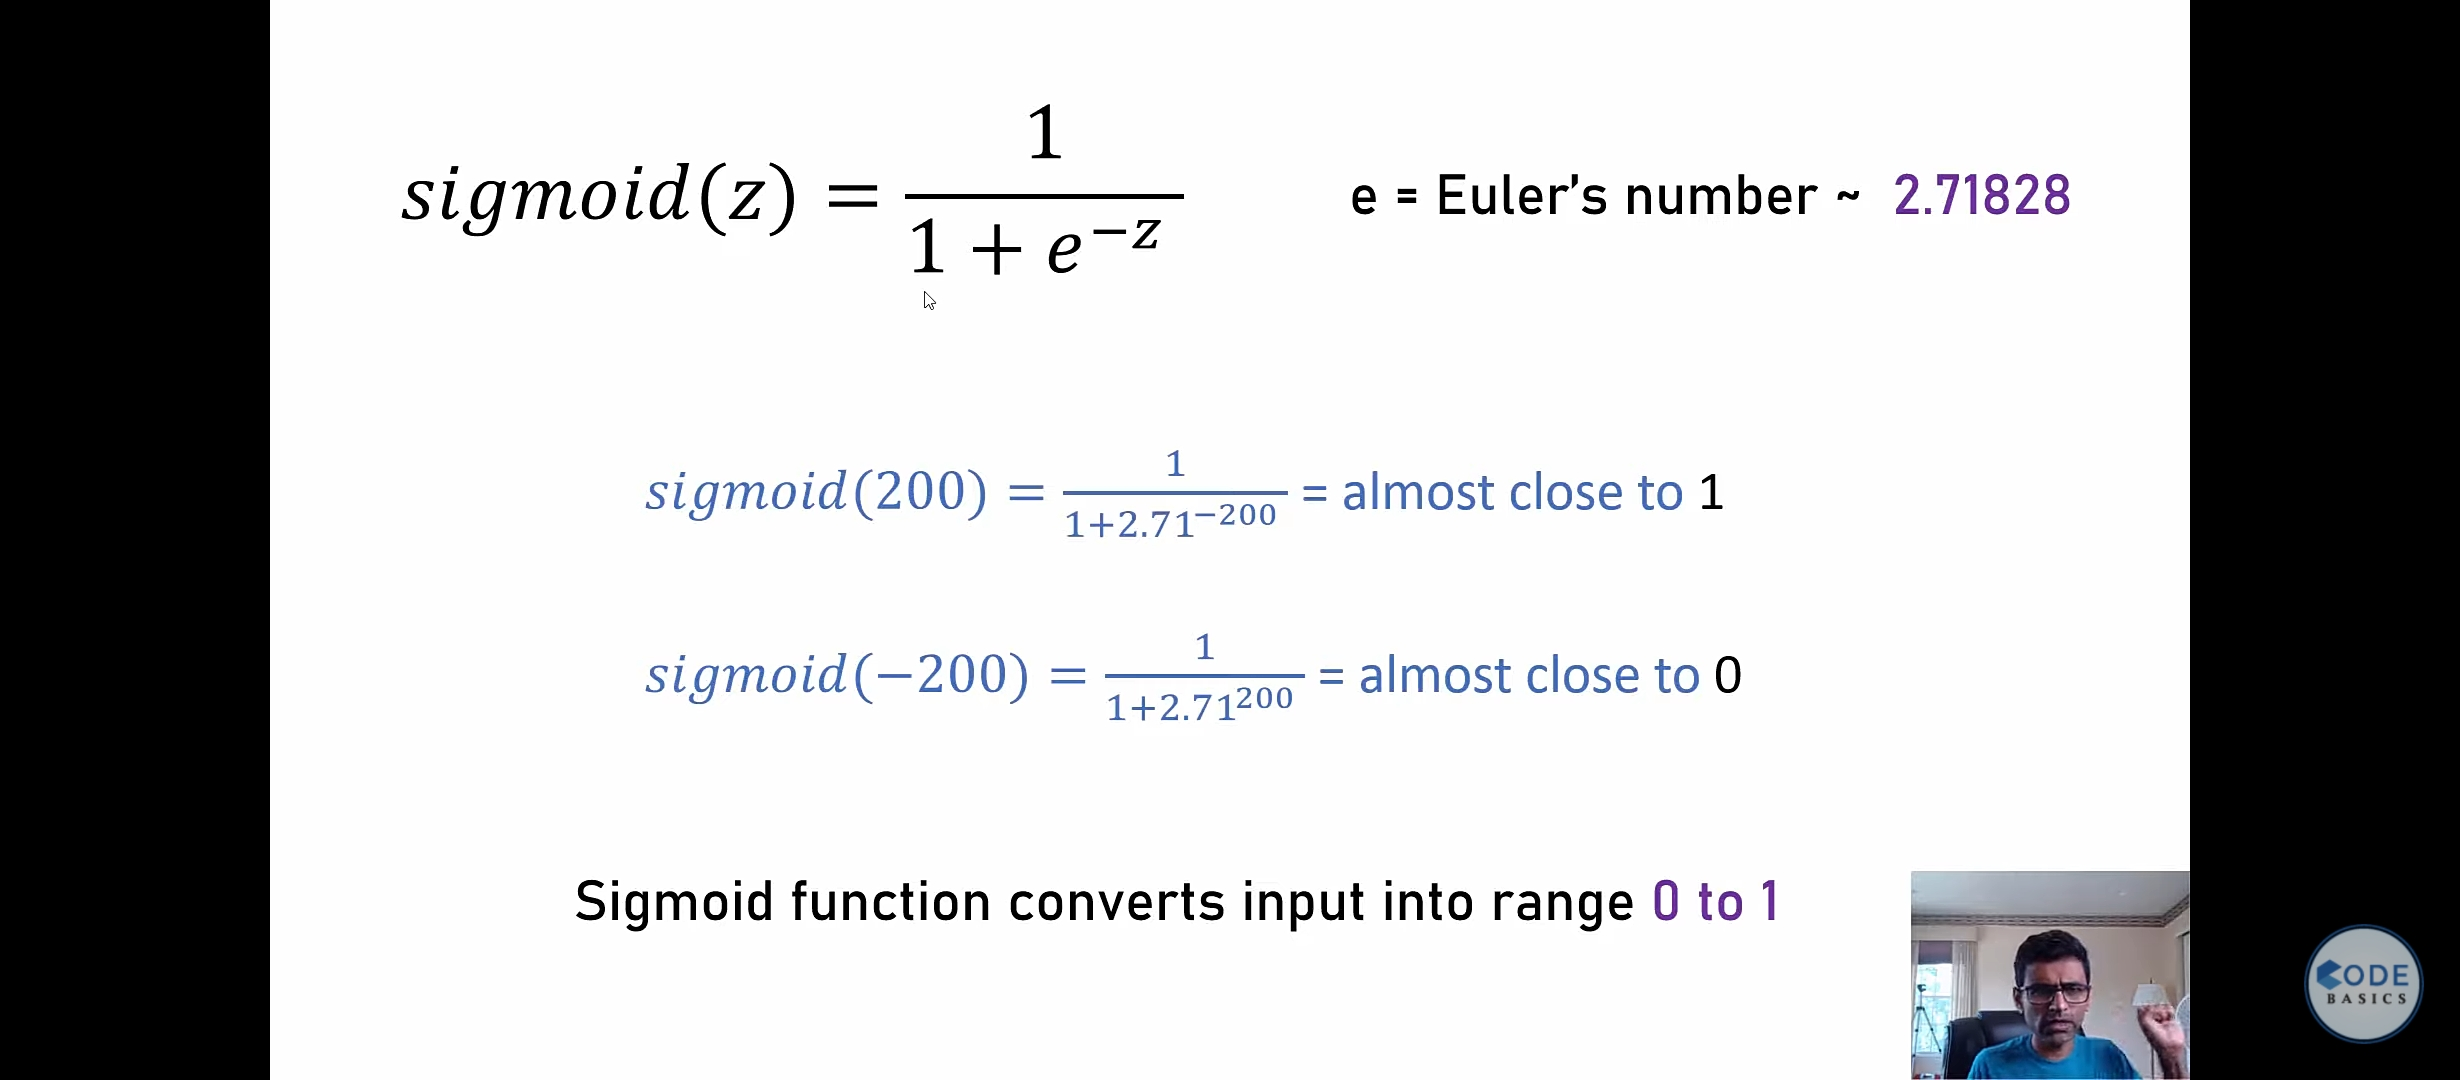

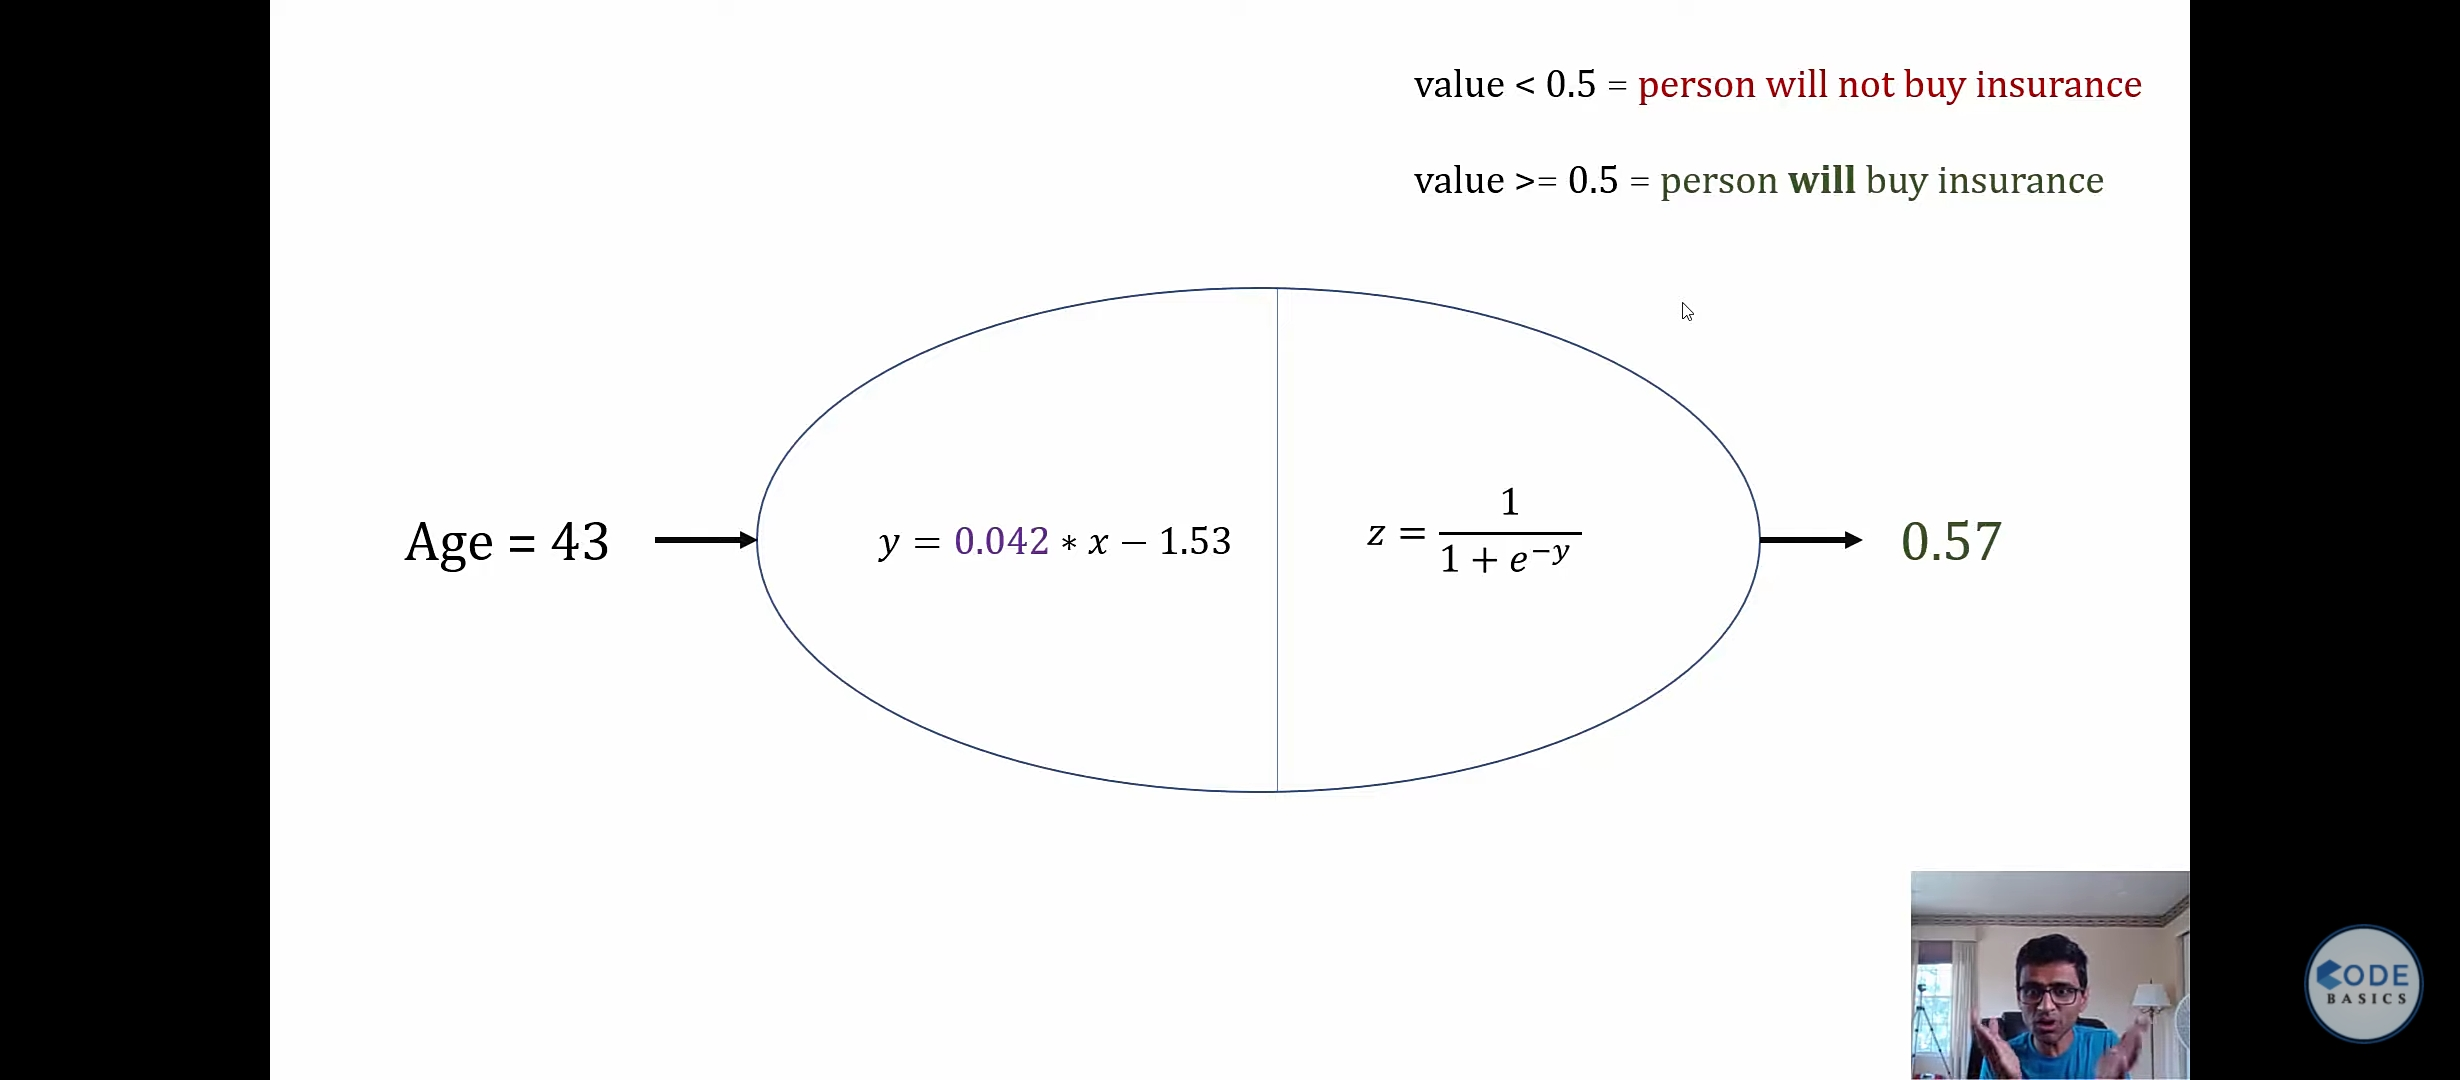

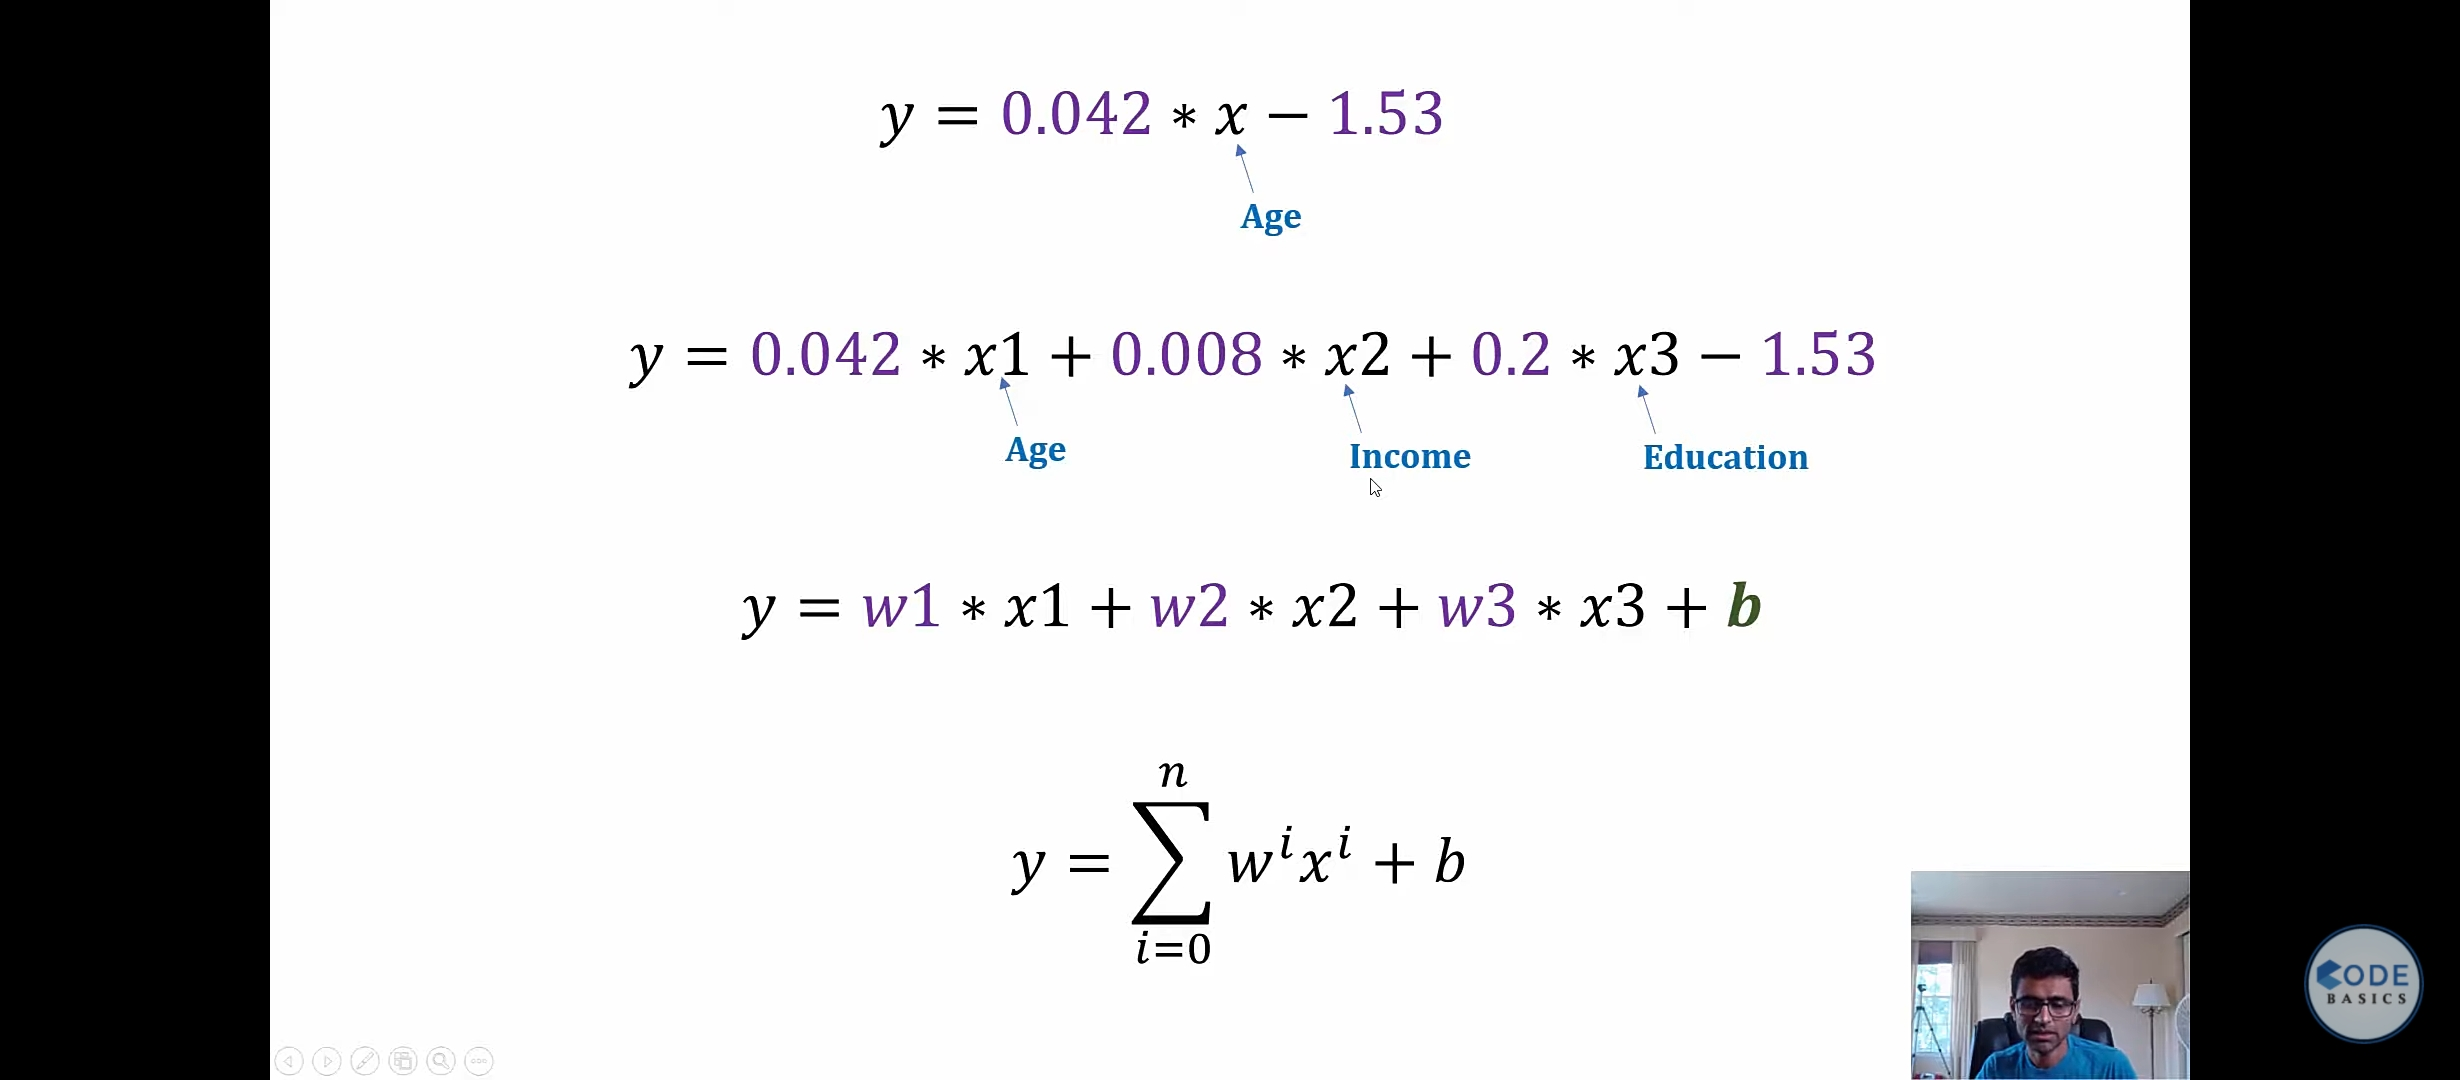

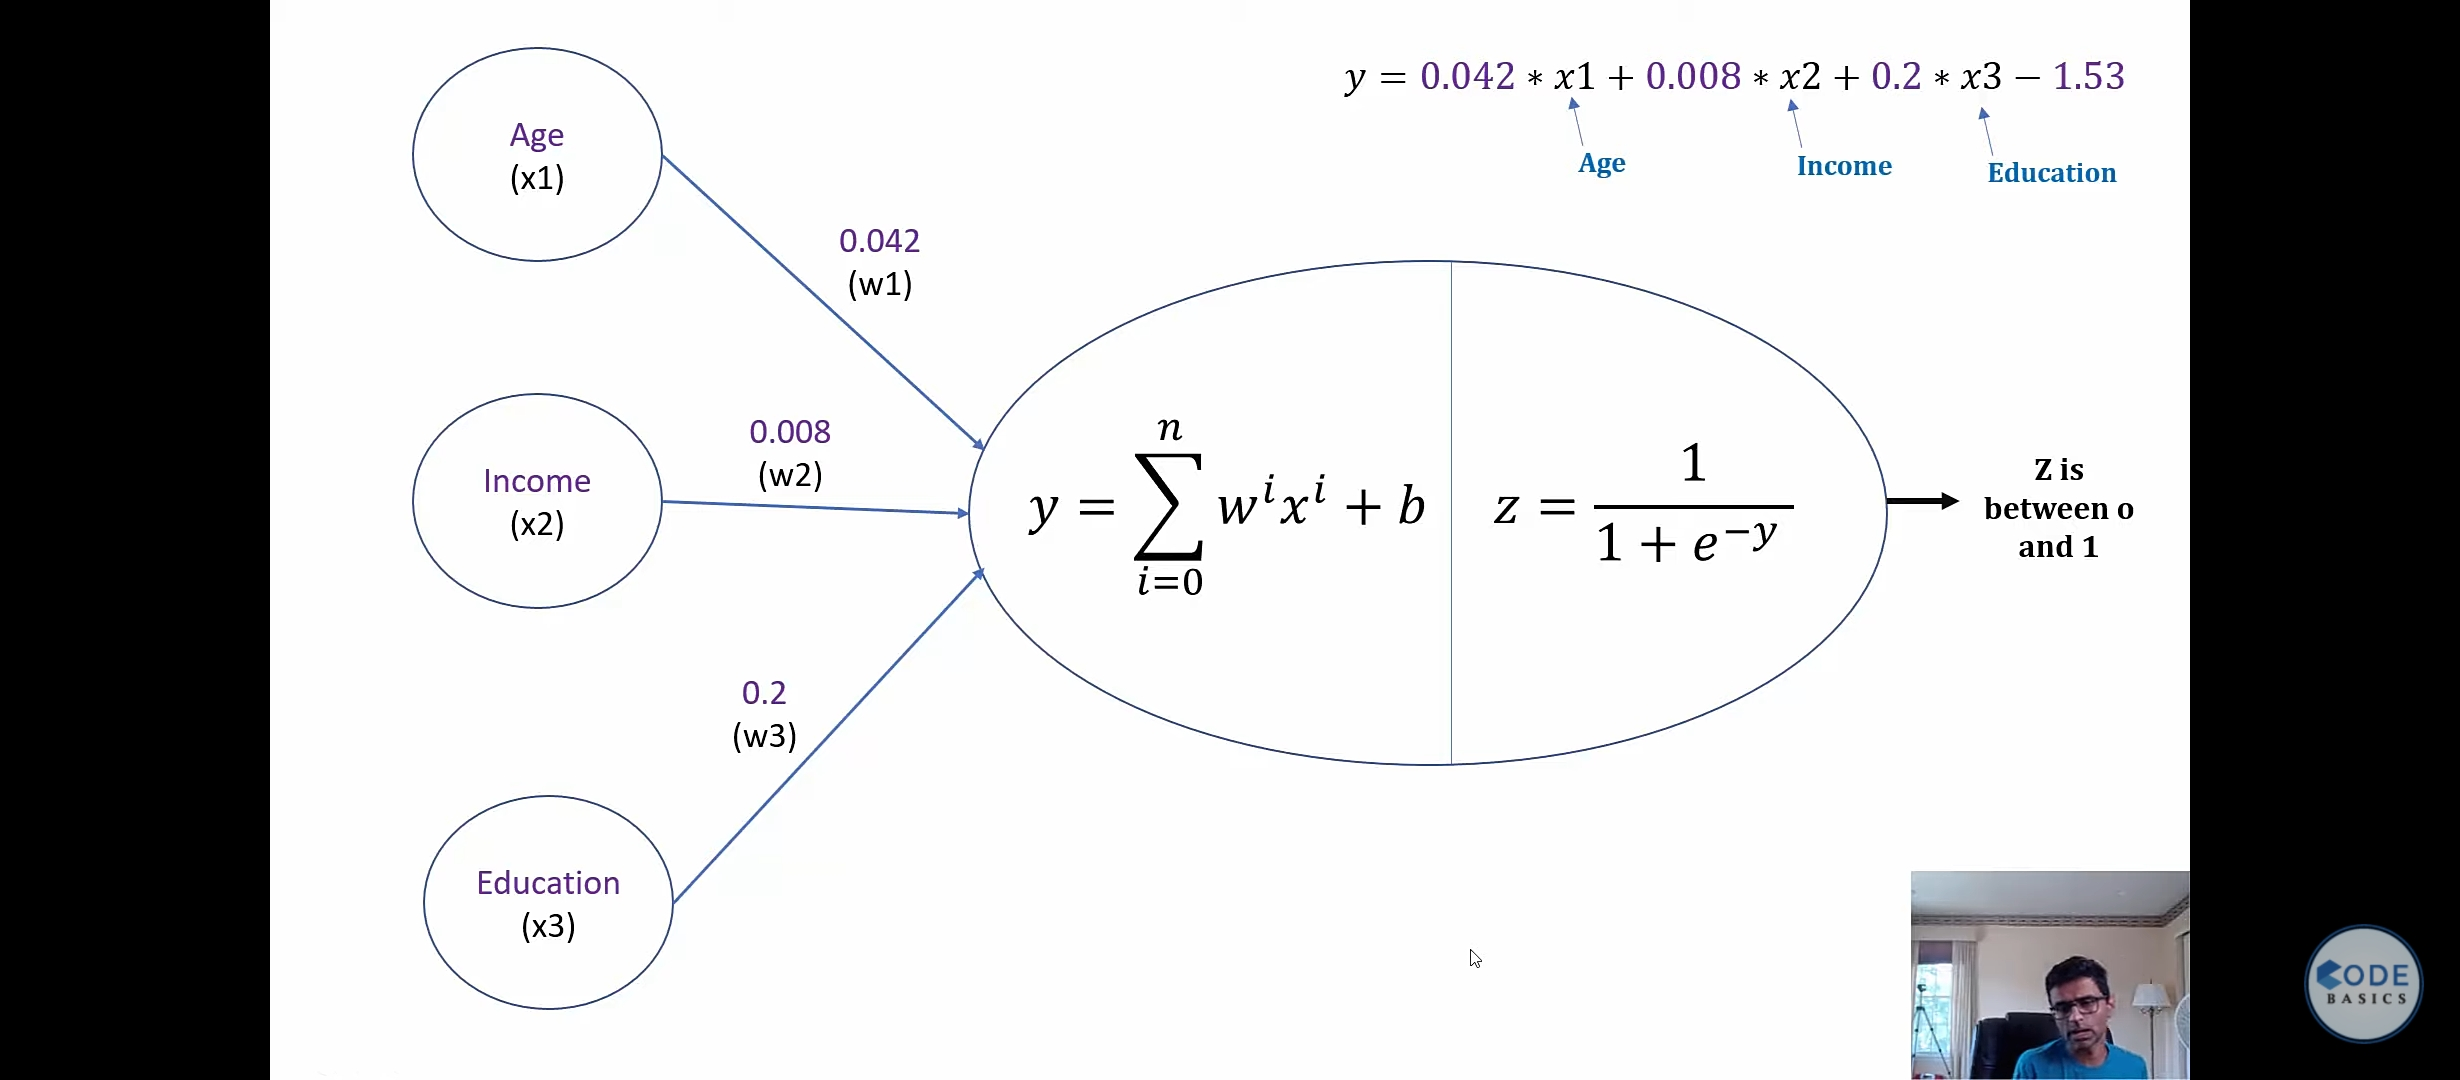

In [1]:

import numpy as np
from sklearn.datasets import make_blobs

In [37]:
np.random.seed(1)
X, y = make_blobs(n_samples=1000, centers=2)


In [38]:
X

array([[-3.05837272,  4.48825769],
       [-8.60973869, -3.72714879],
       [ 1.37129721,  5.23107449],
       ...,
       [-1.91854276,  4.59578307],
       [-1.79600465,  4.28743568],
       [-9.90967641, -4.69510878]], shape=(1000, 2))

In [39]:
y[:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
y = y[:, np.newaxis]

In [41]:
y[:10]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [42]:
learning_rate=0.1
num_iters=10000

In [43]:
m = X.shape[0]
n = X.shape[1]

In [44]:
m,n

(1000, 2)

In [45]:
weights = np.zeros((n, 1))

In [46]:
weights

array([[0.],
       [0.]])

y = w*x + bias

In [47]:
bias = 0

In [48]:
y_pred = np.dot(X, weights) + bias

In [49]:
y_pred[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [50]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [51]:
y_pred = sigmoid(y_pred)

In [52]:
y_pred[:10]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [53]:
# calculate mean log loss or cost
cost = ( -1/ m* np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))

In [54]:
# -1/m: This is the negative reciprocal of the number of training examples (m). It's used to normalize the cost.
# np.sum(...): This calculates the sum of the elements in the array.
# y * np.log(y_pred): This calculates the log loss for the positive class (when y is 1).
# (1 - y) * np.log(1 - y_pred): This calculates the log loss for the negative class (when y is 0).
# +: This adds the log losses for the positive and negative classes.
# Log Loss:
# The log loss, also known as the cross-entropy loss, is a common loss function for binary classification problems. It's defined as:
# L(y, y_pred) = -[y * log(y_pred) + (1-y) * log(1-y_pred)]

In [55]:
# d(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))/dw
# d(wx+b*np.log(y_pred) + (1 - xw+b) * np.log(1 - y_pred))/dw

In [56]:
# back prop / gradient calculations
dcost_dw = 1 / m * np.dot(X.T, (y_pred - y))
dcost_db = 1 / m * np.sum(y_pred - y)

In [57]:
weights -= learning_rate* dcost_dw

In [58]:
weights

array([[-0.20869595],
       [-0.20898256]])

In [59]:
bias -= learning_rate * dcost_db

In [60]:
bias

np.float64(0.0)

In [61]:
y_predict = sigmoid(np.dot(X, weights) + bias)

In [62]:
y_predict[:10]

array([[0.42563142],
       [0.92928296],
       [0.20110739],
       [0.92867262],
       [0.96158531],
       [0.96766793],
       [0.951044  ],
       [0.94590837],
       [0.35442136],
       [0.96208224]])

In [63]:
y_predict_labels = y_predict > 0.5

In [64]:
y_predict_labels[:10]

array([[False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True]])

In [65]:
y[:10]

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [68]:
np.sum(y==y_predict_labels)

np.int64(986)

In [69]:
X.shape[0]

1000

In [70]:
np.sum(y==y_predict_labels)/X.shape[0]

np.float64(0.986)

In [71]:
print(f"Accuracy: {np.sum(y==y_predict_labels)/X.shape[0]}")

Accuracy: 0.986


In [72]:
import numpy as np
from sklearn.datasets import make_blobs


class LogisticRegression:
    def __init__(self, X, learning_rate=0.1, num_iters=10000):
        self.lr = learning_rate
        self.num_iters = num_iters

        # m for #training_examples, n for #features
        self.m, self.n = X.shape

    def train(self, X, y):
        # init weights
        self.weights = np.zeros((self.n, 1))
        self.bias = 0

        for it in range(self.num_iters + 1):
            # calculate hypothesis
            y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # calculate cost
            cost = (
                -1
                / self.m
                * np.sum(y * np.log(y_predict) + (1 - y) * np.log(1 - y_predict))
            )

            # back prop / gradient calculations
            dw = 1 / self.m * np.dot(X.T, (y_predict - y))
            db = 1 / self.m * np.sum(y_predict - y)

            # gradient descent update step
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # print cost sometimes
            if it % 1000 == 0:
                print(f"Cost after iteration {it}: {cost}")

        return self.weights, self.bias

    def predict(self, X):
        y_predict = self.sigmoid(np.dot(X, self.weights) + self.bias)
        y_predict_labels = y_predict > 0.5

        return y_predict_labels

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

In [73]:
np.random.seed(1)
X, y = make_blobs(n_samples=1000, centers=2)
y = y[:, np.newaxis]

logreg = LogisticRegression(X)
w, b = logreg.train(X, y)
y_predict = logreg.predict(X)

print(f"Accuracy: {np.sum(y==y_predict)/X.shape[0]}")

Cost after iteration 0: 0.6931471805599454
Cost after iteration 1000: 0.0011600933459921785
Cost after iteration 2000: 0.0006491300880665668
Cost after iteration 3000: 0.000462485964887221
Cost after iteration 4000: 0.0003635915165060212
Cost after iteration 5000: 0.0003016459230941666
Cost after iteration 6000: 0.00025890699961499065
Cost after iteration 7000: 0.00022749458542860117
Cost after iteration 8000: 0.00020335181473262736
Cost after iteration 9000: 0.0001841682130989886
Cost after iteration 10000: 0.00016852716747729746
Accuracy: 1.0
